In [56]:
# Import libraries
import xgboost as xgb
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Set directory
# "C:\Users\AHema\OneDrive - CGIAR\Desktop\Poverty Mapping\Small area estimation\Burkina Faso\Application of Fay-Herriot Model for Burkina Faso\00.Data\data_admin2.csv"
path = 'C:/Users/AHema/OneDrive - CGIAR/Desktop/Poverty Mapping/Small area estimation/Burkina Faso/Application of Fay-Herriot Model for Burkina Faso/00.Data/'

# Import data
data = pd.read_csv(path + 'data_admin2.csv', header = 0)
sample = data.dropna() 
y = sample['direct']
X = sample.drop(columns = ['adm2_pcode', 'direct', 'true'])  
#data = data.drop(columns = ['adm2_pcode', 'direct'])  

# Implement XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100,
        max_depth=6, eta=0.3)
model.fit(X, y)

# Generate poverty estimates
X_all = sample.drop(columns = ['adm2_pcode', 'direct', 'true']) 
y_pred = model.predict(X_all)

# Import additional functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Create empty lists
r2_direct = []
r2_true = []



In [57]:
y_pred = pd.DataFrame({'adm2_pcode': sample['adm2_pcode'], 'predict': y_pred, 'direct': sample['direct']})
y_pred

,adm2_pcode,predict,direct
0,BF1300,0.319601,0.319637
1,BF4601,0.396335,0.396037
2,BF4602,0.540457,0.540426
3,BF4603,0.280790,0.280919
4,BF4604,0.606551,0.607073
5,BF4605,0.536128,0.536172
6,BF4606,0.375316,0.374854
7,BF4701,0.436422,0.436363
8,BF4702,0.658282,0.658861
9,BF4801,0.198692,0.198440


In [58]:
# Run loop
for i in range(100):
    # Split data and fit model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model.fit(X_train, y_train)
    # Get predicted and true values
    y_pred = model.predict(X_test)
    y_true = [sample['true'][i] for i in y_test.index]
    # Save R-squared results
    r2_direct.append(r2_score(y_test, y_pred))
    r2_true.append(r2_score(y_true, y_pred))

Text(0.5, 0, 'Reference Measure')

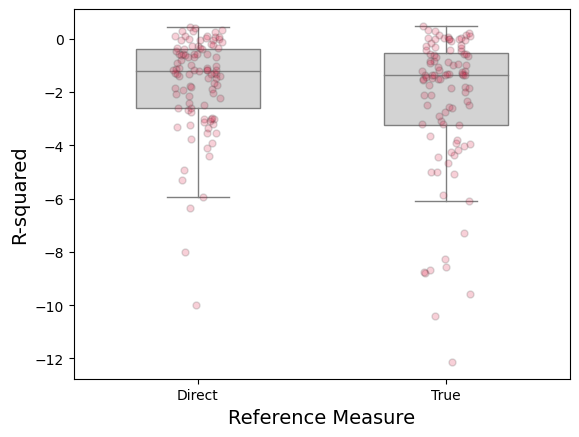

In [59]:
# Plot results  
import seaborn as sns
df = pd.DataFrame({'Direct': r2_direct, 'True': r2_true})
df = pd.melt(df)
b = sns.boxplot(data = df, x = "variable", y = "value", width = 0.5,
        color = "lightgray", linewidth = 1, showfliers = False)
b = sns.stripplot(data = df, x = "variable", y = "value", color = "crimson", 
        linewidth = 1, alpha = 0.2) 
b.set_ylabel("R-squared", fontsize = 14)
b.set_xlabel("Reference Measure", fontsize = 14)